# **openNMT**

Sheyda Eshaghi & Parnian Fazel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/NLP CA5 NMT/data/train.en" .
!cp "/content/drive/MyDrive/NLP CA5 NMT/data/test.en" .
!cp "/content/drive/MyDrive/NLP CA5 NMT/data/valid.en" .
!cp "/content/drive/MyDrive/NLP CA5 NMT/data/train.fa" .
!cp "/content/drive/MyDrive/NLP CA5 NMT/data/test.fa" .
!cp "/content/drive/MyDrive/NLP CA5 NMT/data/valid.fa" .
!cp "/content/drive/MyDrive/NLP CA5 NMT/transformer_model_config.yaml" .

In [ ]:
#!pip install hazm
!pip install parsivar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.2 MB 430 kB/s 
     |████████████████████████████████| 1.5 MB 37.1 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492972 sha256=0fd7369f5474b108fca0e08d9be53a63c02606eeb3cb44f7477220a9a4be728a
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449922 sha256=40e07c0c29980c7a722206467223919ec7b626c5fec81cada665fa5bd142e83c
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
!pip install torchtext==0.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.7 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.12.0
    Uninstalling torchtext-0.12.0:
      Successfully uninstalled torchtext-0.12.0


In [ ]:
!pip install configargparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from parsivar import * 
import pandas as pd
import numpy as np
import math
import re
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Preprocess**

In [ ]:
from parsivar import Normalizer
from parsivar import SpellCheck
parsivar_normalizer = Normalizer(pinglish_conversion_needed=True)
parsivar_tokenizer = Tokenizer()

def no_space(char, prev_char):
        return char in set(',.!?') and prev_char != ' '

def farsi_preprocess():
  farsi_files_to_be_preprocessed = ["train.fa", "valid.fa", "test.fa"]
  for files in farsi_files_to_be_preprocessed:
    lines = []
    with open(files) as file:
        for line in file:
          line = ''.join([' ' + char if i > 0 and no_space(char, line[i - 1]) else char for i, char in enumerate(line)])
          line = re.sub('[)(}{-]', ' ', line)
          lines.append(' '.join(parsivar_tokenizer.tokenize_words(parsivar_normalizer.normalize(line.rstrip())))) #word_tokenize in parsivar
        with open(f"preprocessed_{files}", 'w') as f:
          f.write('\n'.join(lines))

def english_preprocess():
  english_files_to_be_preprocessed = ["train.en", "valid.en", "test.en"]
  for files in english_files_to_be_preprocessed:
    lines = []
    with open(files) as file:
        for line in file:
          line = ''.join([' ' + char if i > 0 and no_space(char, line[i - 1]) else char for i, char in enumerate(line)])
          line = re.sub('[)(}{-]', ' ', line)
          lines.append(' '.join(nltk.word_tokenize(' '.join([word.lower() for word in line.split(' ')]))))
        with open(f"preprocessed_{files}", 'w') as f:
          f.write('\n'.join(lines))

farsi_preprocess()
english_preprocess()

In [ ]:
!git clone -b legacy https://github.com/OpenNMT/OpenNMT-py

Cloning into 'OpenNMT-py'...
remote: Enumerating objects: 17675, done.
remote: Total 17675 (delta 0), reused 0 (delta 0), pack-reused 17675
Receiving objects: 100% (17675/17675), 273.61 MiB | 16.47 MiB/s, done.
Resolving deltas: 100% (12753/12753), done.


In [ ]:
!pip install -r ./OpenNMT-py/floyd_requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pytorch/text to /tmp/pip-req-build-y74uvw1x
  Running command git clone -q https://github.com/pytorch/text /tmp/pip-req-build-y74uvw1x
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for torchtext
Failed to build torchtext
ERROR: Could not build wheels for torchtext which use PEP 517 and cannot be installed directly


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!python OpenNMT-py/tools/learn_bpe.py -i preprocessed_train.en -o BPE_train.en -s 10000

In [ ]:
!python OpenNMT-py/tools/learn_bpe.py -i preprocessed_train.fa -o BPE_train.fa -s 10000

In [ ]:
!python OpenNMT-py/tools/apply_bpe.py -c BPE_train.fa -i preprocessed_train.fa -o train_bpe.fa

In [ ]:
!python OpenNMT-py/tools/apply_bpe.py -c BPE_train.en -i preprocessed_train.en -o train_bpe.en

In [ ]:
!python OpenNMT-py/tools/apply_bpe.py -c BPE_train.fa -i preprocessed_valid.fa -o valid_bpe.fa

In [ ]:
!python OpenNMT-py/tools/apply_bpe.py -c BPE_train.en -i preprocessed_valid.en -o valid_bpe.en

In [ ]:
!python OpenNMT-py/tools/apply_bpe.py -c BPE_train.en -i preprocessed_test.en -o test_bpe.en

In [ ]:
!python OpenNMT-py/preprocess.py -train_src train_bpe.en -train_tgt train_bpe.fa -valid_src valid_bpe.en -valid_tgt valid_bpe.fa -save_data BPE_Model

[2022-06-09 13:45:38,339 INFO] Extracting features...
[2022-06-09 13:45:38,339 INFO]  * number of source features: 0.
[2022-06-09 13:45:38,340 INFO]  * number of target features: 0.
[2022-06-09 13:45:38,340 INFO] Building `Fields` object...
[2022-06-09 13:45:38,340 INFO] Building & saving training data...
[2022-06-09 13:45:38,403 INFO] Building shard 0.
[2022-06-09 13:45:39,476 INFO]  * saving 0th train data shard to BPE_Model.train.0.pt.
[2022-06-09 13:45:40,673 INFO]  * tgt vocab size: 10008.
[2022-06-09 13:45:40,683 INFO]  * src vocab size: 9805.
[2022-06-09 13:45:40,735 INFO] Building & saving validation data...
[2022-06-09 13:45:40,768 INFO] Building shard 0.
[2022-06-09 13:45:40,775 INFO]  * saving 0th valid data shard to BPE_Model.valid.0.pt.


**Transformer**

Config:

save_checkpoint_steps: 1000

valid_steps: 1000

train_steps: 35000

world_size: 1

gpu_ranks: 0

batch_size: 4096

batch_type: tokens

normalization: tokens

encoder_type: transformer

decoder_type: transformer

position_encoding: true

param_init_glorot: true

enc_layers: 6

dec_layers: 6

rnn_size: 512

word_vec_size: 512

label_smoothing: 0.1

dropout: 0.1

attention_dropout: 0.1

#**Transformer**

In [ ]:
!python OpenNMT-py/train.py -data BPE_Model -save_model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model -config transformer_model_config.yaml

[2022-06-09 03:50:25,792 INFO]  * src vocab size = 9805
[2022-06-09 03:50:25,793 INFO]  * tgt vocab size = 10008
[2022-06-09 03:50:25,793 INFO] Building model...
[2022-06-09 03:50:30,467 INFO] NMTModel(
  (encoder): TransformerEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(9805, 512, padding_idx=1)
        )
        (pe): PositionalEncoding(
          (dropout): Dropout(p=0.3, inplace=False)
        )
      )
    )
    (transformer): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linear_keys): Linear(in_features=512, out_features=512, bias=True)
          (linear_values): Linear(in_features=512, out_features=512, bias=True)
          (linear_query): Linear(in_features=512, out_features=512, bias=True)
          (softmax): Softmax(dim=-1)
          (dropout): Dropout(p=0.1, inplace=False)
          (final_linear): Linear(in_features=512, out_featur

###**Study on Validation Data**

In [ ]:
from tqdm import tqdm

bleus = list()
for i in range(0,16000+1,1000):
  s = !python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_{i}.pt -src preprocessed_valid.en -output translated_{i}.txt -replace_unk -verbose
  f = !perl OpenNMT-py/tools/multi-bleu.perl preprocessed_valid.fa < translated_{i}.txt
  bleus.append(float(f[-1].split()[2][:-1]))

In [ ]:
for i, b in enumerate(bleus):
  print(f"Ckeckpoint {i}: {b}")

Ckeckpoint 0: 0.0
Ckeckpoint 1: 0.0
Ckeckpoint 2: 0.0
Ckeckpoint 3: 0.0
Ckeckpoint 4: 0.76
Ckeckpoint 5: 0.88
Ckeckpoint 6: 1.45
Ckeckpoint 7: 1.7
Ckeckpoint 8: 1.96
Ckeckpoint 9: 2.0
Ckeckpoint 10: 2.1
Ckeckpoint 11: 2.3
Ckeckpoint 12: 2.72
Ckeckpoint 13: 2.6
Ckeckpoint 14: 2.86
Ckeckpoint 15: 2.74
Ckeckpoint 16: 2.59


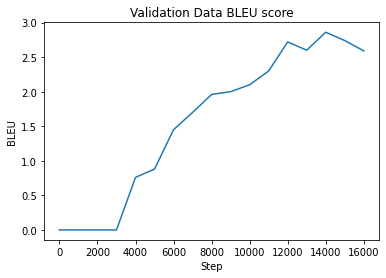

In [ ]:
plt.plot(range(0,16000+1,1000), bleus)
plt.title('Validation Data BLEU score')
plt.ylabel('BLEU')
plt.xlabel('Step')
plt.show()

###**Study on Test Data**

In [ ]:
from tqdm import tqdm

bleus = list()
for i in range(0,16000+1,1000):
  s = !python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_{i}.pt -src preprocessed_test.en -output translated_{i}.txt -replace_unk -verbose
  f = !perl OpenNMT-py/tools/multi-bleu.perl preprocessed_test.fa < translated_{i}.txt
  bleus.append(float(f[-1].split()[2][:-1]))

In [ ]:
for i, b in enumerate(bleus):
  print(f"Ckeckpoint {i}: {b}")

Ckeckpoint 0: 0.0
Ckeckpoint 1: 0.0
Ckeckpoint 2: 0.0
Ckeckpoint 3: 0.2
Ckeckpoint 4: 0.69
Ckeckpoint 5: 0.76
Ckeckpoint 6: 0.89
Ckeckpoint 7: 1.31
Ckeckpoint 8: 1.59
Ckeckpoint 9: 1.42
Ckeckpoint 10: 1.7
Ckeckpoint 11: 1.89
Ckeckpoint 12: 2.26
Ckeckpoint 13: 2.15
Ckeckpoint 14: 2.36
Ckeckpoint 15: 2.08
Ckeckpoint 16: 2.11


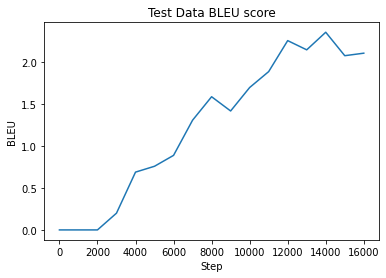

In [ ]:
plt.plot(range(0,16000+1,1000), bleus)
plt.title('Test Data BLEU score')
plt.ylabel('BLEU')
plt.xlabel('Step')
plt.show()

####Test Translation Results in Step **3000**

In [ ]:
!python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_3000.pt -src preprocessed_test.en -output translated_3000.txt -replace_unk -verbose

[2022-06-09 17:21:22,586 INFO] Translating shard 0.
/content/OpenNMT-py/onmt/translate/beam_search.py:209: UserWarning: An output with one or more elements was resized since it had shape [150], which does not match the required output shape [30, 5].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  torch.mul(self.topk_scores, length_penalty, out=self.topk_log_probs)
/content/OpenNMT-py/onmt/translate/beam_search.py:212: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 

####Test Translation Results in Step **10000**

In [ ]:
!python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_10000.pt -src preprocessed_test.en -output translated_10000.txt -replace_unk -verbose

[2022-06-09 17:23:32,661 INFO] Translating shard 0.
/content/OpenNMT-py/onmt/translate/beam_search.py:209: UserWarning: An output with one or more elements was resized since it had shape [150], which does not match the required output shape [30, 5].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  torch.mul(self.topk_scores, length_penalty, out=self.topk_log_probs)
/content/OpenNMT-py/onmt/translate/beam_search.py:212: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 

####Test Translation Results in Step **14000**

In [ ]:
!python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_14000.pt -src preprocessed_test.en -output translated_10000.txt -replace_unk -verbose

[2022-06-09 17:26:02,011 INFO] Translating shard 0.
/content/OpenNMT-py/onmt/translate/beam_search.py:209: UserWarning: An output with one or more elements was resized since it had shape [150], which does not match the required output shape [30, 5].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  torch.mul(self.topk_scores, length_penalty, out=self.topk_log_probs)
/content/OpenNMT-py/onmt/translate/beam_search.py:212: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 

# **Transformer**

Config:

save_checkpoint_steps: 1000

valid_steps: 1000

train_steps: 22000

world_size: 1

gpu_ranks: 0

batch_size: 4096

batch_type: tokens

normalization: tokens

encoder_type: transformer

decoder_type: transformer

position_encoding: true

param_init_glorot: true

enc_layers: 6

dec_layers: 6

param_init: 0

rnn_size: 512

word_vec_size: 512

label_smoothing: 0.1

dropout: 0.1

attention_dropout: 0.1


In [ ]:
!python OpenNMT-py/train.py -data BPE_Model -save_model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model -config transformer_model_config.yaml

[2022-06-09 03:25:15,861 INFO]  * src vocab size = 9805
[2022-06-09 03:25:15,862 INFO]  * tgt vocab size = 10008
[2022-06-09 03:25:15,862 INFO] Building model...
[2022-06-09 03:25:20,576 INFO] NMTModel(
  (encoder): TransformerEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(9805, 512, padding_idx=1)
        )
        (pe): PositionalEncoding(
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (transformer): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linear_keys): Linear(in_features=512, out_features=512, bias=True)
          (linear_values): Linear(in_features=512, out_features=512, bias=True)
          (linear_query): Linear(in_features=512, out_features=512, bias=True)
          (softmax): Softmax(dim=-1)
          (dropout): Dropout(p=0.1, inplace=False)
          (final_linear): Linear(in_features=512, out_featur

###**Study on Validation Data**

In [ ]:
from tqdm import tqdm

bleus = list()
for i in tqdm(range(0,22000+1,1000)):
  !python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_{i}.pt -src preprocessed_valid.en -output valid_translated_{i}.txt -replace_unk -verbose
  #!sed -i "s/@@ //g"  valid_translated_{i}.txt
  f = !perl OpenNMT-py/tools/multi-bleu.perl preprocessed_valid.fa < valid_translated_{i}.txt
  bleus.append(float(f[-1].split()[2][:-1]))

In [ ]:
for i, b in enumerate(bleus):
  print(f"Checkpoint {i}: {b}")

Checkpoint 0: 0.0
Checkpoint 1: 0.0
Checkpoint 2: 0.0
Checkpoint 3: 0.0
Checkpoint 4: 0.0
Checkpoint 5: 0.0
Checkpoint 6: 0.71
Checkpoint 7: 0.94
Checkpoint 8: 1.7
Checkpoint 9: 0.0
Checkpoint 10: 0.85
Checkpoint 11: 0.96
Checkpoint 12: 0.79
Checkpoint 13: 0.99
Checkpoint 14: 1.09
Checkpoint 15: 1.35
Checkpoint 16: 1.54
Checkpoint 17: 1.24
Checkpoint 18: 1.8
Checkpoint 19: 1.16
Checkpoint 20: 1.37
Checkpoint 21: 1.53
Checkpoint 22: 1.34


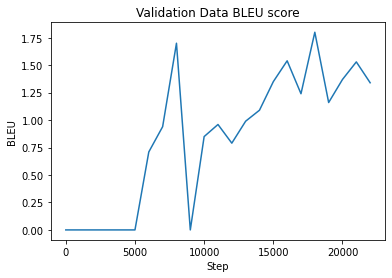

In [ ]:
plt.plot(range(0,22000+1,1000), bleus)
plt.title('Validation Data BLEU score')
plt.ylabel('BLEU')
plt.xlabel('Step')
plt.show()

###**Study on Test Data**

In [ ]:
from tqdm import tqdm

bleus = list()
for i in range(0,22000+1,1000):
  !python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/rain_With_BPE_Model_step_{i}.pt -src preprocessed_test.en -output translated_{i}.txt -replace_unk -verbose
  !sed -i "s/@@ //g"  translated_{i}.txt
  f = !perl OpenNMT-py/tools/multi-bleu.perl preprocessed_test.fa < translated_{i}.txt
  bleus.append(float(f[-1].split()[2][:-1]))

In [ ]:
for i, b in enumerate(bleus):
  print(f"Checkpoint {i}: {b}")

Checkpoint 0: 0.0
Checkpoint 1: 0.0
Checkpoint 2: 0.0
Checkpoint 3: 0.0
Checkpoint 4: 0.18
Checkpoint 5: 0.34
Checkpoint 6: 0.33
Checkpoint 7: 0.0
Checkpoint 8: 0.81
Checkpoint 9: 0.56
Checkpoint 10: 0.28
Checkpoint 11: 0.82
Checkpoint 12: 0.7
Checkpoint 13: 0.46
Checkpoint 14: 0.69
Checkpoint 15: 0.73
Checkpoint 16: 1.04
Checkpoint 17: 0.89
Checkpoint 18: 0.98
Checkpoint 19: 0.94
Checkpoint 20: 1.03
Checkpoint 21: 0.9
Checkpoint 22: 0.86


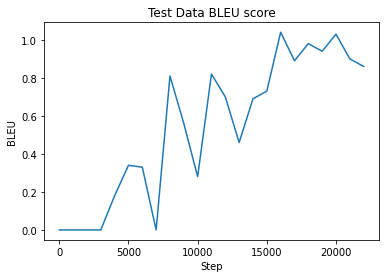

In [ ]:
plt.plot(range(0,22000+1,1000), bleus)
plt.title('Test Data BLEU score')
plt.ylabel('BLEU')
plt.xlabel('Step')
plt.show()

####Translation Results in Step **10000**

In [ ]:
!python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_10000.pt -src preprocessed_test.en -output translated_{i}.txt -replace_unk -verbose


[2022-06-09 20:23:06,863 INFO] Translating shard 0.
/content/OpenNMT-py/onmt/translate/beam_search.py:209: UserWarning: An output with one or more elements was resized since it had shape [150], which does not match the required output shape [30, 5].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  torch.mul(self.topk_scores, length_penalty, out=self.topk_log_probs)
/content/OpenNMT-py/onmt/translate/beam_search.py:212: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 

####Translation Results in Step **16000**

In [ ]:
!python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_16000.pt -src preprocessed_test.en -output translated_{i}.txt -replace_unk -verbose


[2022-06-09 20:25:06,933 INFO] Translating shard 0.
/content/OpenNMT-py/onmt/translate/beam_search.py:209: UserWarning: An output with one or more elements was resized since it had shape [150], which does not match the required output shape [30, 5].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  torch.mul(self.topk_scores, length_penalty, out=self.topk_log_probs)
/content/OpenNMT-py/onmt/translate/beam_search.py:212: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 

# **RNN**

In [ ]:
!python OpenNMT-py/train.py -data BPE_Model -save_model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model -world_size 1 -gpu_rank 0 -train_steps 30000 -valid_steps 1000 -save_checkpoint_steps 3000

[2022-06-09 13:51:37,871 INFO]  * src vocab size = 9805
[2022-06-09 13:51:37,871 INFO]  * tgt vocab size = 10008
[2022-06-09 13:51:37,871 INFO] Building model...
[2022-06-09 13:51:48,763 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(9805, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 500, num_layers=2, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(10008, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1000, 500)
        (1): LSTMCell(500, 500)
      )
    )
    (attn): GlobalAttention(
      (linear_in): Linear(in_features=500, out_features=500, bias=False)
      (

###**Study on Validation Data**

In [ ]:
from tqdm import tqdm

bleus = list()
for i in range(0,30000+1,3000):
  s = !python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_{i}.pt -src preprocessed_valid.en -output translated_{i}.txt -replace_unk -verbose
  f = !perl OpenNMT-py/tools/multi-bleu.perl preprocessed_valid.fa < translated_{i}.txt
  bleus.append(float(f[-1].split()[2][:-1]))

In [ ]:
for i, b in enumerate(bleus):
  print(f"Checkpoint {i}: {b}")

Checkpoint 0: 0.0
Checkpoint 1: 1.08
Checkpoint 2: 2.99
Checkpoint 3: 4.7
Checkpoint 4: 5.32
Checkpoint 5: 4.29
Checkpoint 6: 4.15
Checkpoint 7: 4.13
Checkpoint 8: 4.71
Checkpoint 9: 4.49
Checkpoint 10: 4.01


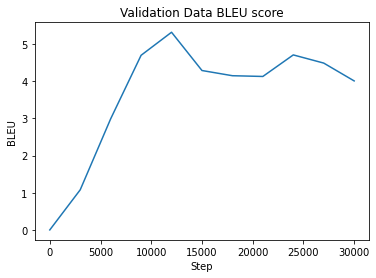

In [ ]:
plt.plot(range(0,30000+1,3000), bleus)
plt.title('Validation Data BLEU score')
plt.ylabel('BLEU')
plt.xlabel('Step')
plt.show()

###**Study on Test Data**

In [ ]:
from tqdm import tqdm

bleus = list()
for i in range(0,30000+1,3000):
  s = !python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_{i}.pt -src preprocessed_test.en -output translated_{i}.txt -replace_unk -verbose
  f = !perl OpenNMT-py/tools/multi-bleu.perl preprocessed_test.fa < translated_{i}.txt
  bleus.append(float(f[-1].split()[2][:-1]))

In [ ]:
for i, b in enumerate(bleus):
  print(f"Checkpoint {i}: {b}")

Checkpoint 0: 0.0
Checkpoint 1: 0.65
Checkpoint 2: 3.26
Checkpoint 3: 4.71
Checkpoint 4: 4.56
Checkpoint 5: 4.42
Checkpoint 6: 4.31
Checkpoint 7: 3.77
Checkpoint 8: 4.51
Checkpoint 9: 4.52
Checkpoint 10: 3.91


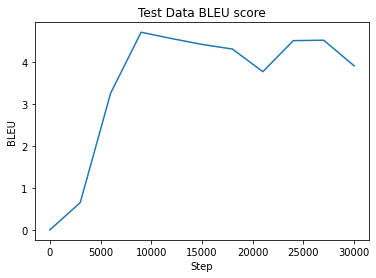

In [ ]:
plt.plot(range(0,30000+1,3000), bleus)
plt.title('Test Data BLEU score')
plt.ylabel('BLEU')
plt.xlabel('Step')
plt.show()

####Translation Results in Step **3000**

In [ ]:
!python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_3000.pt -src preprocessed_test.en -output translated_3000.txt -replace_unk -verbose

[2022-06-09 16:12:41,616 INFO] Translating shard 0.
/content/OpenNMT-py/onmt/translate/beam_search.py:209: UserWarning: An output with one or more elements was resized since it had shape [150], which does not match the required output shape [30, 5].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  torch.mul(self.topk_scores, length_penalty, out=self.topk_log_probs)
/content/OpenNMT-py/onmt/translate/beam_search.py:212: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 

####Translation Results in Step **15000**

In [ ]:
!python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_15000.pt -src preprocessed_test.en -output translated_15000.txt -replace_unk -verbose

[2022-06-09 16:39:06,331 INFO] Translating shard 0.
/content/OpenNMT-py/onmt/translate/beam_search.py:209: UserWarning: An output with one or more elements was resized since it had shape [150], which does not match the required output shape [30, 5].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  torch.mul(self.topk_scores, length_penalty, out=self.topk_log_probs)
/content/OpenNMT-py/onmt/translate/beam_search.py:212: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 

####Translation Results in Step **30000**

In [ ]:
!python OpenNMT-py/translate.py -model /content/drive/MyDrive/NLP\ CA5\ NMT/Train_With_BPE_Model_step_30000.pt -src preprocessed_test.en -output translated_30000.txt -replace_unk -verbose

[2022-06-09 16:40:03,794 INFO] Translating shard 0.
/content/OpenNMT-py/onmt/translate/beam_search.py:209: UserWarning: An output with one or more elements was resized since it had shape [150], which does not match the required output shape [30, 5].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  torch.mul(self.topk_scores, length_penalty, out=self.topk_log_probs)
/content/OpenNMT-py/onmt/translate/beam_search.py:212: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 